In [1]:
# Load data from /Volumes/Exodus/Data/6DOF 2023/Test1

import os
import pandas as pd

# Sample data from a text file
""" 
Time (ms)	169448
Reference	-112.9437	180.4520	-208.2180	0.4736	0.4635	-0.5261	0.5330
Fenestrated	-21.9398	56.9237	-295.1500	0.0451	0.2661	-0.8368	-0.4763
Curved	-62.3648	51.9654	-243.1492	0.2314	0.3947	-0.7884	0.4112
Camera	-75.6810	35.3394	-270.7886	0.5233	-0.3824	-0.6371	-0.4171
"""


# Define the function to extract data from text files and create DataFrames for each tool
def extract_data_from_txt_files(directory):
    data = {"Reference": [], "Fenestrated": [], "Curved": [], "Camera": []}

    for filename in os.listdir(directory):
        if filename.endswith(".txt"):
            filepath = os.path.join(directory, filename)
            try:
                with open(filepath, "r") as file:
                    lines = file.readlines()
                    # Store time in milliseconds
                    time = int(lines[0].split()[2])
                    for line in lines[1:]:  # Skip the header
                        parts = line.strip().split()
                        if len(parts) == 8:
                            label = parts[0]
                            x, y, z = float(parts[1]), float(parts[2]), float(parts[3])
                            qx, qy, qz, qw = (
                                float(parts[4]),
                                float(parts[5]),
                                float(parts[6]),
                                float(parts[7]),
                            )
                            data[label].append(
                                {
                                    "time": time,
                                    "x": x,
                                    "y": y,
                                    "z": z,
                                    "qx": qx,
                                    "qy": qy,
                                    "qz": qz,
                                    "qw": qw,
                                }
                            )
            except Exception as e:
                print(f"Error reading {filepath}: {e}")
    return data

In [2]:
PATH_6DOF = "data/6DOF/"  # Path to CSV data
DATA_PATH = "/Volumes/Exodus/Data/6DOF 2023/"  # Local raw data path
RESULTS_PATH = "results/"  # Path to store results
    
if not os.path.exists(RESULTS_PATH):
    os.makedirs(RESULTS_PATH)

# Store folders which exist inside DATA_PATH
DIRECTORIES = [f for f in os.listdir(DATA_PATH) if os.path.isdir(os.path.join(DATA_PATH, f))]

In [3]:
# Create all data files
for directory in DIRECTORIES:
    # Remove if using more than one directory
    # This is for testing purposes
    DATA_PATH = DATA_PATH + directory + "/"
    RESULTS_PATH = RESULTS_PATH + directory + "/"
    
    if not os.path.exists(RESULTS_PATH):
        os.makedirs(RESULTS_PATH)
        
    if not os.path.exists(PATH_6DOF + directory):
        os.makedirs(PATH_6DOF + directory)
        
        extracted_data = extract_data_from_txt_files(DATA_PATH)

        # Convert the extracted data into pandas DataFrames
        reference_df = pd.DataFrame(extracted_data["Reference"]).sort_values("time")
        fenestrated_df = pd.DataFrame(extracted_data["Fenestrated"]).sort_values("time")
        curved_df = pd.DataFrame(extracted_data["Curved"]).sort_values("time")
        camera_df = pd.DataFrame(extracted_data["Camera"]).sort_values("time")

        reference_df.to_csv(PATH_6DOF + directory + "/reference.csv", index=False)
        fenestrated_df.to_csv(PATH_6DOF + directory + "/fenestrated.csv", index=False)
        curved_df.to_csv(PATH_6DOF + directory + "/curved.csv", index=False)
        camera_df.to_csv(PATH_6DOF + directory + "/camera.csv", index=False)
        print(f"Created data files for {directory}")
    else:
        print(f"Data files for {directory} already exist")

    # # Displaying the first few entries for verification
    # # print(reference_df.head())
    # # print(fenestrated_df.head())
    # # print(curved_df.head())
    # # print(camera_df.head())

    # # Displaying the first few entries for verification
    # print(reference_df.shape)
    # print(fenestrated_df.shape)
    # print(curved_df.shape)
    # print(camera_df.shape)

print("All data files created")

Data files for Test 1 already exist
All data files created


In [4]:
# Load the data from the CSV files
def load_data(directory, n = None):
    if n is not None:
        reference_df = pd.read_csv(PATH_6DOF + directory + "/reference.csv").head(n)
        fenestrated_df = pd.read_csv(PATH_6DOF + directory + "/fenestrated.csv").head(n)
        curved_df = pd.read_csv(PATH_6DOF + directory + "/curved.csv").head(n)
        camera_df = pd.read_csv(PATH_6DOF + directory + "/camera.csv").head(n)
    else:
        reference_df = pd.read_csv(PATH_6DOF + directory + "/reference.csv")
        fenestrated_df = pd.read_csv(PATH_6DOF + directory + "/fenestrated.csv")
        curved_df = pd.read_csv(PATH_6DOF + directory + "/curved.csv")
        camera_df = pd.read_csv(PATH_6DOF + directory + "/camera.csv")
    return reference_df, fenestrated_df, curved_df, camera_df

reference_df, fenestrated_df, curved_df, camera_df = load_data("Test 1", 10)

In [5]:
# Custom function which will run for all the directories
def load_all_data():
    all_data = {}
    for directory in DIRECTORIES:
        reference_df, fenestrated_df, curved_df, camera_df = load_data(directory)
        all_data[directory] = {
            "Reference": reference_df,
            "Fenestrated": fenestrated_df,
            "Curved": curved_df,
            "Camera": camera_df,
        }
    return all_data

# data = load_all_data()

In [6]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots


# Define a function to create scatter plots for x, y, and z coordinates
def create_2d_scatter_plots(df, tool_name):
    fig = make_subplots(
        rows=1, cols=3, subplot_titles=("X Coordinate", "Y Coordinate", "Z Coordinate")
    )

    fig.add_trace(
        go.Scatter(x=df["time"], y=df["x"], mode="markers", name="x"), row=1, col=1
    )

    fig.add_trace(
        go.Scatter(x=df["time"], y=df["y"], mode="markers", name="y"), row=1, col=2
    )

    fig.add_trace(
        go.Scatter(x=df["time"], y=df["z"], mode="markers", name="z"), row=1, col=3
    )

    fig.update_layout(
        title_text=f"2D Scatter Plots of {tool_name} Tool Coordinates Over Time"
    )
    fig.show()


# Plot the data for each tool
create_2d_scatter_plots(reference_df, "Reference")
create_2d_scatter_plots(fenestrated_df, "Fenestrated")
create_2d_scatter_plots(curved_df, "Curved")
create_2d_scatter_plots(camera_df, "Camera")

In [7]:
# Define a function to create a combined 3D motion plot for all tools
def create_combined_3d_motion_plot(dfs, tool_names):
    fig = make_subplots(
        rows=1,
        cols=4,
        specs=[
            [
                {"type": "scatter3d"},
                {"type": "scatter3d"},
                {"type": "scatter3d"},
                {"type": "scatter3d"},
            ]
        ],
        subplot_titles=tool_names,
    )

    for i, (df, tool_name) in enumerate(zip(dfs, tool_names), start=1):
        fig.add_trace(
            go.Scatter3d(
                x=df["x"],
                y=df["y"],
                z=df["z"],
                mode="lines+markers",
                marker=dict(size=4),
                line=dict(width=2),
                name=tool_name,
            ),
            row=1,
            col=i,
        )

    fig.update_layout(
        title="3D Motion Plots of Tools",
        scene=dict(
            xaxis_title="X Position", yaxis_title="Y Position", zaxis_title="Z Position"
        ),
    )

    fig.show()

# DataFrames for each tool
dfs = [reference_df, fenestrated_df, curved_df, camera_df]
tool_names = ["Reference", "Fenestrated", "Curved", "Camera"]

# Create the combined 3D motion plot
create_combined_3d_motion_plot(dfs, tool_names)

In [8]:
import numpy as np
import imageio.v2 as imageio
from PIL import Image
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


os.environ["IMAGEIO_FFMPEG_EXE"] = "/opt/homebrew/bin/ffmpeg"

total_frames = max(len(df) for df in [reference_df, fenestrated_df, curved_df, camera_df])

# Only take first 10 rows for animation
# reference_df = reference_df.head(10)
# fenestrated_df = fenestrated_df.head(10)
# curved_df = curved_df.head(10)
# camera_df = camera_df.head(10)

In [9]:
# Preprocess the DataFrame to add a frame column
def preprocess_for_animation(df):
    df = df.copy()
    df["frame"] = np.arange(len(df))
    return df


reference_df = preprocess_for_animation(reference_df)
fenestrated_df = preprocess_for_animation(fenestrated_df)
curved_df = preprocess_for_animation(curved_df)
camera_df = preprocess_for_animation(camera_df)

In [10]:
# Calculate the min and max values for each axis across all tools
x_min = min(
    reference_df["x"].min(),
    fenestrated_df["x"].min(),
    curved_df["x"].min(),
    camera_df["x"].min(),
)
x_max = max(
    reference_df["x"].max(),
    fenestrated_df["x"].max(),
    curved_df["x"].max(),
    camera_df["x"].max(),
)
y_min = min(
    reference_df["y"].min(),
    fenestrated_df["y"].min(),
    curved_df["y"].min(),
    camera_df["y"].min(),
)
y_max = max(
    reference_df["y"].max(),
    fenestrated_df["y"].max(),
    curved_df["y"].max(),
    camera_df["y"].max(),
)
z_min = min(
    reference_df["z"].min(),
    fenestrated_df["z"].min(),
    curved_df["z"].min(),
    camera_df["z"].min(),
)
z_max = max(
    reference_df["z"].max(),
    fenestrated_df["z"].max(),
    curved_df["z"].max(),
    camera_df["z"].max(),
)

In [11]:
# Function to create 3D plots and save as images
def create_3d_plots(dfs, tool_names, save_path, dpi=300, figsize=(10, 10)):
    if not os.path.exists(save_path):
        os.makedirs(save_path)

    for k in range(total_frames):
        fig = plt.figure(figsize=figsize)
        ax = fig.add_subplot(111, projection="3d")

        for df, tool_name in zip(dfs, tool_names):
            if k < len(df):
                x_vals = df["x"][: k + 1]
                y_vals = df["y"][: k + 1]
                z_vals = df["z"][: k + 1]

                if len(x_vals) >= 3:
                    ax.plot(
                        x_vals[-3:],
                        y_vals[-3:],
                        z_vals[-3:],
                        label=tool_name,
                        alpha=0.2,
                    )
                if len(x_vals) >= 2:
                    ax.plot(
                        x_vals[-2:],
                        y_vals[-2:],
                        z_vals[-2:],
                        label=tool_name,
                        alpha=0.4,
                    )
                if len(x_vals) >= 1:
                    ax.plot(
                        x_vals[-1:],
                        y_vals[-1:],
                        z_vals[-1:],
                        label=tool_name,
                        alpha=1.0,
                    )

        ax.set_xlim([x_min, x_max])
        ax.set_ylim([y_min, y_max])
        ax.set_zlim([z_min, z_max])
        ax.set_xlabel("X Position")
        ax.set_ylabel("Y Position")
        ax.set_zlabel("Z Position")
        ax.set_title("3D Motion of Tools")

        # Plot unique label names only
        handles, labels = ax.get_legend_handles_labels()
        unique_labels = []
        unique_handles = []
        for i, label in enumerate(labels):
            if label not in unique_labels:
                unique_labels.append(label)
                unique_handles.append(handles[i])
        ax.legend(unique_handles, unique_labels)

        plt.savefig(f"{save_path}/frame_{k:04d}.png", dpi=dpi, bbox_inches="tight")
        plt.close()

        # print(f"Generated frame {k}/{total_frames}")


# Create the 3D plots and save frames
motion_save_path = RESULTS_PATH + "frames"
dfs = [reference_df, fenestrated_df, curved_df, camera_df]
tool_names = ["Reference", "Fenestrated", "Curved", "Camera"]

# If no frames exist then create them
if not os.path.exists(motion_save_path):
    os.makedirs(motion_save_path)
    create_3d_plots(dfs, tool_names, motion_save_path, dpi=300, figsize=(10, 10))
else:
    print("Frames already exist")

Frames already exist


In [12]:
# fixed_size = (2400, 2448)

# # Resize images to fixed size
# for image in os.listdir(save_path):
#     if image.endswith(".png") and not image.startswith("resized_"):
#         img_path = os.path.join(save_path, image)
#         img = Image.open(img_path)
#         img = img.resize(
#             fixed_size, Image.Resampling.LANCZOS
#         )  # Use Image.Resampling.LANCZOS
#         img.save(os.path.join(save_path, "resized_" + image))
#         # Delete original image
#         os.remove(img_path)

In [13]:
# Function to create a video from images
def create_video_from_images(image_folder, output_video_path, fps=10):    
    images = sorted([img for img in os.listdir(image_folder) if img.endswith(".png")])
    # frame = Image.open(os.path.join(image_folder, images[0]))
    # frame_width, frame_height = frame.size

    writer = imageio.get_writer(output_video_path, fps=fps)
    for image in images:
        img_path = os.path.join(image_folder, image)
        writer.append_data(imageio.imread(img_path))
    writer.close()


# Create a video from the saved frames
output_video_path = RESULTS_PATH + "motion_video_6DOF.mp4"
if not os.path.exists(output_video_path):
    create_video_from_images(DATA_PATH, output_video_path, fps=10)
else:
    print("Video already exists")

In [14]:
# Create video from BMP files
def stitch_images(bmp_directory, output_video_path):
    # List all BMP files in the directory
    bmp_files = sorted(
        [
            os.path.join(bmp_directory, f)
            for f in os.listdir(bmp_directory)
            if f.endswith(".png") and not f.startswith(".")
        ]
    )

    # Create a video writer object
    with imageio.get_writer(output_video_path, fps=10) as writer:
        for file_path in bmp_files:
            image = imageio.imread(file_path)
            writer.append_data(image)

    print(f"Video saved at {output_video_path}")
    
output_image_name = RESULTS_PATH + "stitched_image.mp4"

# Stitch the images together
stitch_images(DATA_PATH, output_image_name)

Video saved at results/Test 1/stitched_image.mp4


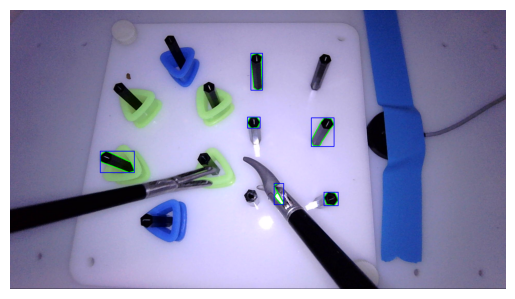

In [15]:
import cv2

# Load image
SAMPLE_IMAGE = DATA_PATH + "100.bmp"

image = cv2.imread(SAMPLE_IMAGE)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Perform edge detection
edged = cv2.Canny(blurred, 50, 150)

# Find contours
contours, _ = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter contours
filtered_contours = []
min_contour_area = 500  # Adjust this threshold based on your requirement

for contour in contours:
    if cv2.contourArea(contour) > min_contour_area:
        filtered_contours.append(contour)

# Draw contours on the image
contour_image = image.copy()
cv2.drawContours(contour_image, filtered_contours, -1, (0, 255, 0), 2)

# Extract bounding boxes
bounding_boxes = [cv2.boundingRect(contour) for contour in filtered_contours]

# Draw bounding boxes on the image
for x, y, w, h in bounding_boxes:
    cv2.rectangle(contour_image, (x, y), (x + w, y + h), (255, 0, 0), 2)

# Save image as png and display
output_path = RESULTS_PATH + "cv_contour_image.png"
cv2.imwrite(output_path, contour_image)

# Show using matplotlib
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [16]:
import torch
from torchvision.transforms import functional as F
from torchvision.models.detection import maskrcnn_resnet50_fpn

# Load YOLO model
yolo_model = torch.hub.load(
    "ultralytics/yolov5", "yolov5s"
) 

# Load Mask R-CNN model
mask_rcnn_model = maskrcnn_resnet50_fpn(pretrained=True)
mask_rcnn_model.eval()

Using cache found in /Users/scsoc/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-6-14 Python-3.12.3 torch-2.2.2 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


MaskRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(in

In [17]:
def rcnn_segment(image_path, output_path):
    # Load and preprocess image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    image_tensor = F.to_tensor(image_rgb)  # Convert to tensor and normalize

    # Detect tools using YOLO
    yolo_results = yolo_model(image_rgb)

    # Extract YOLO bounding boxes
    yolo_boxes = yolo_results.xyxy[0].cpu().numpy()

    # Detect tools and create masks using Mask R-CNN
    with torch.no_grad():
        mask_rcnn_prediction = mask_rcnn_model([image_tensor])

    # Extract masks and bounding boxes
    masks = mask_rcnn_prediction[0]["masks"].cpu().numpy()
    boxes = mask_rcnn_prediction[0]["boxes"].cpu().numpy()

    # Create a copy of the image to draw the results on
    result_image = image.copy()

    # Filter masks that extend beyond YOLO bounding boxes
    for mask, _ in zip(masks, boxes):
        mask_resized = cv2.resize(mask[0], (image.shape[1], image.shape[0]))
        binary_mask = (mask_resized > 0.5).astype(
            np.uint8
        )  # Threshold to create binary mask

        for yolo_box in yolo_boxes:
            x1, y1, x2, y2 = map(int, yolo_box[:4])

            # Create a mask for the bounding box area
            yolo_box_mask = np.zeros_like(binary_mask)
            yolo_box_mask[y1:y2, x1:x2] = 1

            # Calculate the intersection and union of the binary mask and the YOLO bounding box mask
            intersection = np.sum(binary_mask & yolo_box_mask)
            union = np.sum(binary_mask | yolo_box_mask)

            # If the majority of the mask is within the bounding box, retain the mask
            if intersection / union > 0.2:
                # Create a color overlay for the mask
                overlay = np.zeros_like(image)
                overlay[binary_mask == 1] = (0, 255, 0)  # Apply green color to mask

                # Combine original image with overlay
                result_image = cv2.addWeighted(result_image, 1.0, overlay, 0.5, 0)

                # Draw bounding box
                cv2.rectangle(result_image, (x1, y1), (x2, y2), (255, 0, 0), 2)
                break

    cv2.imwrite(output_path, result_image)

    # Show using matplotlib
    plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()


# Test with an image
rcnn_segment(SAMPLE_IMAGE, RESULTS_PATH + "rcnn_segmented_image.png")

In [18]:
def detect_and_draw_shaft(image_path, output_path):
    # Load and preprocess image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

    # Detect tools using YOLO
    yolo_results = yolo_model(image_rgb)

    # Extract YOLO bounding boxes
    yolo_boxes = yolo_results.xyxy[0].cpu().numpy()

    # Create a copy of the image to draw the results on
    result_image = image.copy()

    for yolo_box in yolo_boxes:
        x1, y1, x2, y2 = map(int, yolo_box[:4])
        roi = image[y1:y2, x1:x2]

        # Convert ROI to grayscale and apply edge detection
        gray_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
        blurred_roi = cv2.GaussianBlur(gray_roi, (5, 5), 0)
        edged_roi = cv2.Canny(blurred_roi, 50, 150)

        # Apply Hough Line Transform to find lines
        lines = cv2.HoughLinesP(edged_roi, 1, np.pi / 180, 50, minLineLength=50, maxLineGap=10)

        if lines is not None:
            longest_line = None
            max_length = 0

            for line in lines:
                for x1_line, y1_line, x2_line, y2_line in line:
                    length = np.sqrt((x2_line - x1_line) ** 2 + (y2_line - y1_line) ** 2)
                    if length > max_length:
                        max_length = length
                        longest_line = (x1_line, y1_line, x2_line, y2_line)

            if longest_line is not None:
                x1_line, y1_line, x2_line, y2_line = longest_line

                # Compute the line equation y = mx + c
                if x2_line - x1_line != 0:  # Avoid division by zero
                    m = (y2_line - y1_line) / (x2_line - x1_line)
                    c = y1_line - m * x1_line

                    # Draw the line on the original image
                    cv2.line(result_image, (x1 + x1_line, y1 + y1_line), (x1 + x2_line, y1 + y2_line), (255, 0, 0), 2)

        # Draw the bounding box on the image
        cv2.rectangle(result_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Save and show the result image
    cv2.imwrite(output_path, result_image)

    # Show using matplotlib
    plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

detect_and_draw_shaft(SAMPLE_IMAGE, RESULTS_PATH + "cv_shaft_detection.png")